# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. The common procedure to set up a model:

In [2]:
geo_model = gp.create_model('Single_layer_topo')

gp.init_data(geo_model, extent=[440720, 441129, 69280,69689,-200,250],resolution = (50,50,50),
                         path_i = os.pardir+"/input_data/onelayer_interfaces.csv",
                         path_o = os.pardir+"/input_data/onelayer_orient.csv")



Single_layer_topo  2019-04-26 15:33

In [3]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Default series,2,True,#88cc60,2


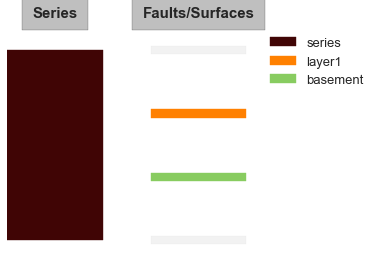

In [4]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

### 2. Adding topography

#### 2 a. Load from raster file

In [5]:
fp = os.pardir+"/input_data/bogota.tif"

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...
showing...


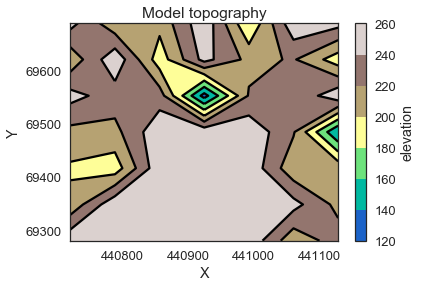

In [6]:
geo_model.add_topography(source='gdal',filepath=fp)

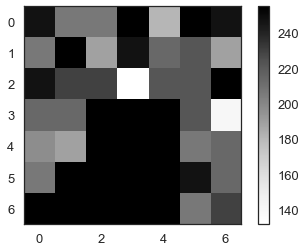

In [7]:
plt.imshow(geo_model.topography.topo.dem_zval)
plt.colorbar()

In [8]:
geo_model.topography._line_in_section()

Gefahr weil resolution


array([[69309,   255],
       [69367,   206],
       [69426,   197],
       [69484,   214],
       [69542,   247],
       [69601,   206],
       [69659,   247]])

In [9]:
geo_model.topography.topo.dem_zval.max(),geo_model.topography.topo.dem_zval.min()

(255, 132)

#### 2.b create fun topography

showing...


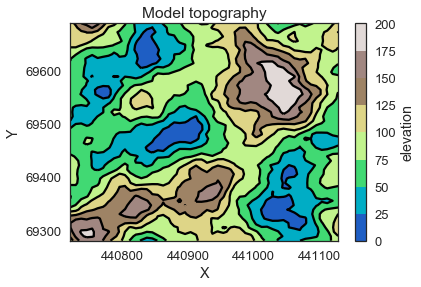

In [5]:
geo_model.add_topography(d_z=np.array([0,200]))

In [6]:
geo_model.topography._line_in_section()

array([[440724,    113],
       [440732,    136],
       [440740,    158],
       [440748,    162],
       [440756,    160],
       [440764,    164],
       [440773,    149],
       [440781,    129],
       [440789,    117],
       [440797,    109],
       [440805,     86],
       [440814,     72],
       [440822,     57],
       [440830,     47],
       [440838,     44],
       [440846,     42],
       [440854,     50],
       [440863,     66],
       [440871,     81],
       [440879,     78],
       [440887,     75],
       [440895,     86],
       [440904,     91],
       [440912,     97],
       [440920,    105],
       [440928,    108],
       [440936,    102],
       [440944,    102],
       [440953,    106],
       [440961,    103],
       [440969,    116],
       [440977,    120],
       [440985,    116],
       [440994,    112],
       [441002,     93],
       [441010,     78],
       [441018,     72],
       [441026,     65],
       [441034,     47],
       [441043,     46],


In [31]:
def _line_in_section(self, direction='y', cell_number=0):
    # todo use slice2D of plotting class for this
    if np.any(self.topo.resolution - self.model.grid.resolution[:2]) != 0:
        print('Gefahr weil resolution')
        cell_number_res = (self.values_3D.shape[:2] / self.model.grid.resolution[:2] * cell_number).astype(int)
        cell_number = cell_number_res[0] if direction == 'x' else cell_number_res[1]
    if direction == 'x':
        topoline = self.values_3D[:, cell_number, :][:, [1,2]].astype(int)
    elif direction == 'y':
        topoline = self.values_3D[cell_number,:, :][:, [0,2]].astype(int)
    else:
        raise NotImplementedError
    return topoline

In [32]:
geo_model.topography._line_in_section()

array([[440724,    120],
       [440724,    120],
       [440724,    115],
       [440724,    114],
       [440724,    113],
       [440724,    112],
       [440724,     98],
       [440724,     95],
       [440724,     93],
       [440724,     82],
       [440724,     76],
       [440724,     64],
       [440724,     58],
       [440724,     58],
       [440724,     63],
       [440724,     59],
       [440724,     54],
       [440724,     52],
       [440724,     51],
       [440724,     58],
       [440724,     56],
       [440724,     55],
       [440724,     57],
       [440724,     61],
       [440724,     70],
       [440724,     79],
       [440724,     91],
       [440724,     96],
       [440724,    110],
       [440724,    115],
       [440724,    120],
       [440724,    125],
       [440724,    138],
       [440724,    143],
       [440724,    139],
       [440724,    132],
       [440724,    131],
       [440724,    134],
       [440724,    137],
       [440724,    142],


In [28]:
geo_model.topography.values_3D[0, :, :][:,[0,2]].astype(int)

array([[440724,    120],
       [440732,    131],
       [440740,    140],
       [440748,    147],
       [440756,    160],
       [440764,    163],
       [440773,    169],
       [440781,    159],
       [440789,    153],
       [440797,    156],
       [440805,    159],
       [440814,    156],
       [440822,    152],
       [440830,    147],
       [440838,    153],
       [440846,    162],
       [440854,    163],
       [440863,    165],
       [440871,    162],
       [440879,    149],
       [440887,    144],
       [440895,    144],
       [440904,    138],
       [440912,    131],
       [440920,    118],
       [440928,     99],
       [440936,     92],
       [440944,     91],
       [440953,     82],
       [440961,     74],
       [440969,     83],
       [440977,     82],
       [440985,     77],
       [440994,     81],
       [441002,     87],
       [441010,     89],
       [441018,     84],
       [441026,     68],
       [441034,     64],
       [441043,     68],


In [27]:
_line_in_section(geo_model.topography,direction='y')

array([[440724,    120],
       [440724,    120],
       [440724,    115],
       [440724,    114],
       [440724,    113],
       [440724,    112],
       [440724,     98],
       [440724,     95],
       [440724,     93],
       [440724,     82],
       [440724,     76],
       [440724,     64],
       [440724,     58],
       [440724,     58],
       [440724,     63],
       [440724,     59],
       [440724,     54],
       [440724,     52],
       [440724,     51],
       [440724,     58],
       [440724,     56],
       [440724,     55],
       [440724,     57],
       [440724,     61],
       [440724,     70],
       [440724,     79],
       [440724,     91],
       [440724,     96],
       [440724,    110],
       [440724,    115],
       [440724,    120],
       [440724,    125],
       [440724,    138],
       [440724,    143],
       [440724,    139],
       [440724,    132],
       [440724,    131],
       [440724,    134],
       [440724,    137],
       [440724,    142],


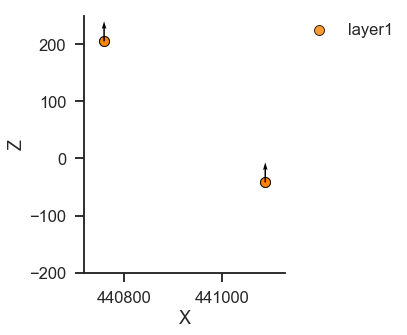

In [6]:
gp.plot.plot_data(geo_model)

In [11]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [13]:
sol2 = gp.compute_model_at(geo_model.topography.values, geo_model, compute_mesh=False)

In [14]:
from gempy.plot.visualization_2d import PlotData2D

In [15]:
plot=PlotData2D(geo_model)

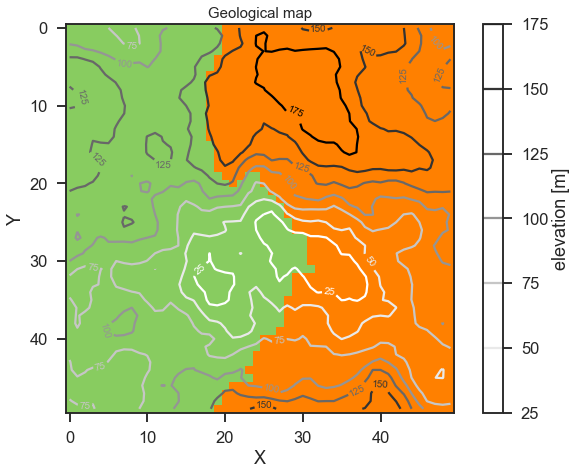

In [16]:
plot.plot_map(sol2)

In [18]:
lith = sol2.lith_block

In [9]:
geo_model.surfaces.modify_order_surfaces(1,0)

In [12]:
sol = gp.compute_model(geo_model)

In [15]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


In [16]:
import copy

In [17]:
old_grid = copy.copy(geo_model.grid)

In [21]:
old_grid.values.shape

(125000, 3)

In [30]:
sol = gp.compute_model_at(old_grid.values, geo_model, compute_mesh=False)

In [25]:
geo_model.interpolator.set_initial_results_matrices()

In [32]:
sol.grid.values.shape

(125000, 3)

In [27]:
geo_model.solutions.grid.resolution

array([ 0.,  0.,  1.])

In [29]:
sol2.lith_block.shape

(2500,)

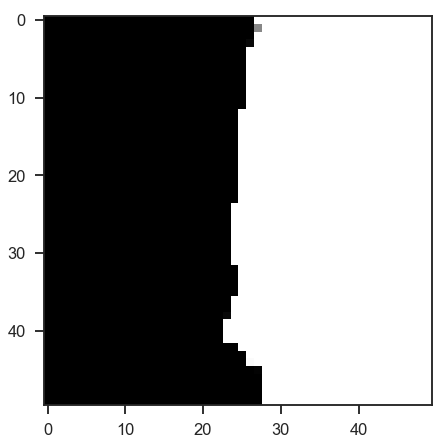

In [34]:
plt.imshow(sol2.lith_block.reshape(50,50),origin='upper')

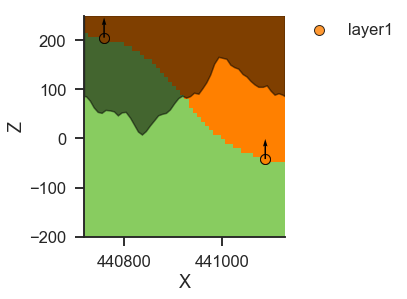

In [13]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=42, block_type='lithology',
                         direction='y', plot_data=True,show_faults=False)

In [16]:
geo_model.topography._line_in_section()

array([[440724,    120],
       [440724,    120],
       [440724,    115],
       [440724,    114],
       [440724,    113],
       [440724,    112],
       [440724,     98],
       [440724,     95],
       [440724,     93],
       [440724,     82],
       [440724,     76],
       [440724,     64],
       [440724,     58],
       [440724,     58],
       [440724,     63],
       [440724,     59],
       [440724,     54],
       [440724,     52],
       [440724,     51],
       [440724,     58],
       [440724,     56],
       [440724,     55],
       [440724,     57],
       [440724,     61],
       [440724,     70],
       [440724,     79],
       [440724,     91],
       [440724,     96],
       [440724,    110],
       [440724,    115],
       [440724,    120],
       [440724,    125],
       [440724,    138],
       [440724,    143],
       [440724,    139],
       [440724,    132],
       [440724,    131],
       [440724,    134],
       [440724,    137],
       [440724,    142],


This is wrong!